In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
from sklearn.model_selection import train_test_split

#import statsmodels.formula.api as smf
#import statsmodels.api as sm
#print(sys.version_info)
#import seaborn as sns

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
df = pd.read_csv('/home/max/code/msds-supevised-learning/Final/data/winequality-white.csv', sep=';')

# thankfully, no NA/missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


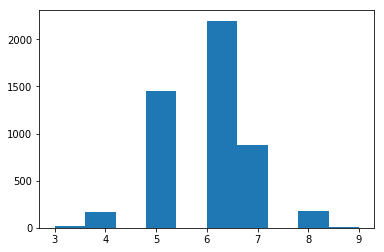

In [4]:
# exploring the ranges of the 'quality' values
df['quality'].hist(grid=False)
plt.show()

In [57]:
# exploring the corelation matrix
corr = df.corr()

# sort the matrix by lowest to highest values
corr_pairs = corr.unstack()
sorted_corr_pairs = corr_pairs.sort_values()

# according to the matrix, there are following interesting correlations:

# positive:
# residual sugar - density = 0.838966
# free sulfur dioxide - total sulfur dioxide = 0.615501
# density - total sulfur dioxide    0.529881
pos_corr = sorted_corr_pairs[(sorted_corr_pairs.values >= 0.5) & (sorted_corr_pairs.values < 1)]
print(pos_corr)

# negative:
# alcohol - density = -0.780138
neg_corr = sorted_corr_pairs[(sorted_corr_pairs.values <= -0.5) & (sorted_corr_pairs.values > -1)]
print(neg_corr)


density               total sulfur dioxide    0.529881
total sulfur dioxide  density                 0.529881
                      free sulfur dioxide     0.615501
free sulfur dioxide   total sulfur dioxide    0.615501
density               residual sugar          0.838966
residual sugar        density                 0.838966
dtype: float64
alcohol  density   -0.780138
density  alcohol   -0.780138
dtype: float64


In [58]:
# however there is no good strong correlation between 'quality' and any of the other columns
print(sorted_corr_pairs['quality'])

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
dtype: float64


In [59]:
# create new categorical column to simplify quality scoring
# adding new column 'score' to be a label of 'bad', 'ok', 'great'.
# based on 'quality' column ranges:
# bad: 3-4, ok: 5-6, great: 7-9
labels = ['bad', 'ok', 'great']
df['score'] = pd.cut(df['quality'], range(3, 10, 2), right=False, labels=labels)

In [60]:
# there is a signigicant imbalance in "score" data, 
# majority of wines fall into "ok" category,
# and "bad" category has the smallest number of samples
print('bad:', df[df['score'] == 'bad'].count()['score'])
print('ok:', df[df['score'] == 'ok'].count()['score'])
print('great:', df[df['score'] == 'great'].count()['score'])


bad: 183
ok: 3655
great: 1055


In [10]:
# because of the significant class imbalance, 
# first ill try to build a linear regression model to predict the raw 'quality' value

# create training and testing datasets
X_train, X_test = train_test_split(df, train_size=0.8, test_size=0.2)

# i will use all the available factors to find best possible for a linear regression
allowed_factors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=X_train).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64
